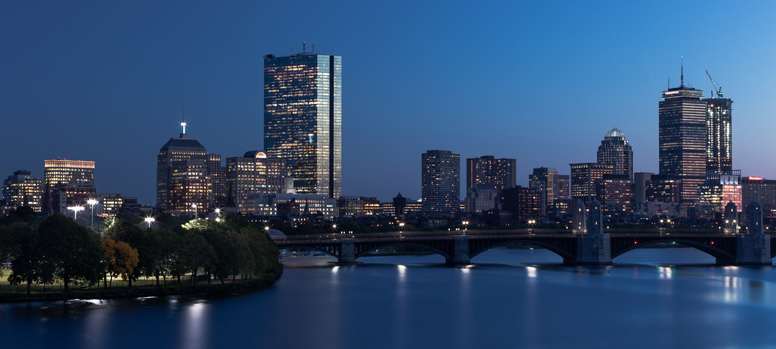

# **Deep Learning Project: <font color='#CD711B'>House Number Digit Recognition**</font> 

## <div class="alert alert-info"><font color='#19597C'>Submission made by: Rebecca Asiimwe</font></div><br><font color='#CD711B'><font size='4'>*Full-code version*</font></font>
****

## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Here we are telling google collab where to find our files.
# This is synonymous to specifying a parent directory to the child directories we'll be working with. 
# In this case "MyDrive/MIT_ADSP"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import h5py
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import losses, optimizers
from tensorflow.keras import backend
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

**Let us check the version of tensorflow.**

In [ ]:
# Checking the Tensorflow version we are running.
# We can simply run: "tf.__version__" or print the version out:
print('This version of TensorFlow is:', tf.__version__)

This version of TensorFlow is: 2.12.0


<div class="alert alert-info"><font size='2'>We are running version 2.12.0 which is the latest release of TensorFlow. Details on what is new in this release like support for Python 3.11, stateless initializers, updates to optimizers/APIs, and new tools to help us load audio data can be found in the release notes (https://github.com/tensorflow/tensorflow/releases/tag/v2.12.0)
</font></div>

## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
file_path = '/content/drive/MyDrive/MIT_ADSP/SVHN_single_grey1.h5' #path to the .h5 file on drive that we'll be loading

# Here, I am opening the SVHN_single_grey1.h5 file in "read only" mode - that is, we are opening the file only for reading.
# If we need to perform other operations on the file, we can pass other modes like r+, w, w+, a or a+ for "read and write",
# "write only", "write and read", "append only" and "append and read" respectively.  However, all these modes will not be
# necessary at this point as we only need to read data from the file.
# .h5 is a library and file format that is great for storing data in a Hierarchical Data Format (HDF)
# and contains multidimensional arrays of data

svhn_df = h5py.File(file_path,'r')

In [ ]:
# Before spliting the data into the train and test datasets, I will check the keys in the file.

# Data in HDF5 files are organized in groups which are a container mechanism of organization used
# by this file type. From a Python perspective, these groups operate somewhat like dictionaries
# and “keys” are the names of groups in our dataset that are encoded before being passed to the HDF5 library.

list(svhn_df.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [ ]:
# We can also run the following line to extract keys from the HDF5 file
svhn_df.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

<div class="alert alert-info"><font size='2'>We can see that the imported file has 6 datasets in it that correspond to the testing, training and validation datasets respectively: *'X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val'* </font></div>


In [ ]:
# Splitting the data into the train and the test datasets, here, I will also extract and have a sneak peek at the validation data:
# Training data
X_train = svhn_df['X_train'][:]
y_train = svhn_df['y_train'][:]

# Testing data
X_test =  svhn_df['X_test'][:]
y_test =  svhn_df['y_test'][:]

## Validation data
X_val =  svhn_df['X_val'][:]
y_val =  svhn_df['y_val'][:]

In [ ]:
# We can close the file after reading the data in - its always good practice to close files,
# 1) in case another resource needs to use the file, 2) making sure files are closed after use will protect against hard-to-debug issues
# like running out of file handles or experiencing corrupted data and 3) we also need to avoid accidental writes especially if some piece
# of code in the entire run file was previously writing to the same file
svhn_df.close()

Check the number of images in the training and the testing dataset.

In [ ]:
# To check the number of images in the training and testing datasets, we can invoke the numpy .shape method to extract the dimensions of these datasets
# X_train.shape, y_train.shape, X_test.shape, y_test.shape # call option one

# Number of images in the training datasets
print('-'*20, "Dimensions of training datasets", '-'*20)
print()
print('The number of images in the training (X_train) is ', X_train.shape[0] , 'and the number of pixels along the height and width of the 2-dimensional image is', X_train.shape[1:])
print('The number of images in the training (y_train) is ', y_train.shape[0] , 'and the number of pixels along the height and width of the 2-dimensional image is', y_train.shape[1:])
print()
print()

# Number of images in the testing datasets
print('-'*20, "Dimensions of testing datasets", '-'*20)
print()
print('The number of images in the testing (X_test) is ', X_test.shape[0] , 'and the number of pixels along the height and width of the 2-dimensional image is', X_test.shape[1:])
print('The number of images in the testing (y_test) is ', y_test.shape[0] , 'and the number of pixels along the height and width of the 2-dimensional image is', y_test.shape[1:])
print()
print()

# Number of images in the validation datasets
print('-'*20, "Dimensions of validation datasets", '-'*20)
print()
print('The number of images in the validation (X_val) is ', X_val.shape[0] , 'and the number of pixels along the height and width of the 2-dimensional image is', X_val.shape[1:])
print('The number of images in the validation (y_val) is ', y_val.shape[0] , 'and the number of pixels along the height and width of the 2-dimensional image is', y_val.shape[1:])


-------------------- Dimensions of training datasets --------------------

The number of images in the training (X_train) is  42000 and the number of pixels along the height and width of the 2-dimensional image is (32, 32)
The number of images in the training (y_train) is  42000 and the number of pixels along the height and width of the 2-dimensional image is ()


-------------------- Dimensions of testing datasets --------------------

The number of images in the testing (X_test) is  18000 and the number of pixels along the height and width of the 2-dimensional image is (32, 32)
The number of images in the testing (y_test) is  18000 and the number of pixels along the height and width of the 2-dimensional image is ()


-------------------- Dimensions of validation datasets --------------------

The number of images in the validation (X_val) is  60000 and the number of pixels along the height and width of the 2-dimensional image is (32, 32)
The number of images in the validation (y_val)

In [ ]:
# Sneak peek into the 2-dimensional Numpy representation (the pixelmap) of the first image in the training and testing dataset.
# Each image is represented by 32x32 square pixel values.
print('-'*20, "X_train", '-'*20)
print(X_train[0], "\n")
print('-'*20, "y_train", '-'*20)
print(y_train[0], "\n")
print('-'*20, "X_test", '-'*20)
print(X_test[0], "\n")
print('-'*20, "y_test", '-'*20)
print(y_test[0])

-------------------- X_train --------------------
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]] 

-------------------- y_train --------------------
2 

-------------------- X_test --------------------
[[ 40.558   46.7917  48.9764 ... 112.1153 112.9904 112.1646]
 [ 39.4379  44.2911  47.1768 ... 111.0122 110.9475 109.9368]
 [ 38.4488  43.6394  48.7098 ... 109.8921 109.9414 109.1048]
 ...
 [ 34.9869  35.4707  39.6676 ... 109.211  109.9074 112.7346]
 [ 35.6602  35.5462  40.3193 ... 110.9998 112.049  114.3431]
 [ 36.1871  35.4214  40.6998 ... 110.0169 111.2017 114.1906]] 

-------------------- y_test --------------------
1


### <div class="alert alert-info">Observations:<br><font size='2'>From the above exploration of the SVHN image dataset, we see that the imported dataset has 6 datasets therein for the training, testing and validation datasets respectively: *'X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val'*  Overall, the X_train, X_test and X_val datasets are are stored in 3-dimensional Numpy arrays (42000, 32, 32), (18000, 32, 32) and (60000, 32, 32) respectively. The first dimensions 42000, 18000 and 60000 denote the number of images in the respective data, and each image is stacked on top of the other, making these 3-dimensional Numpy arrays. The second and third dimensions 32, 32 denote the number of pixels along the height and width of the 2-dimensional image. y_train, y_test and y_val on the other hand are one-dimensional NumPy arrays with 42000, 18000 and 60000 labels respectively. </font></div>



## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

In [ ]:
# How many unique labels do we have in the training dataset
categories=np.unique(y_train)  # Extracting the unique classes from y_train
print("The training dataset has the following", len(categories), "labels :", categories)

The training dataset has the following 10 labels : [0 1 2 3 4 5 6 7 8 9]


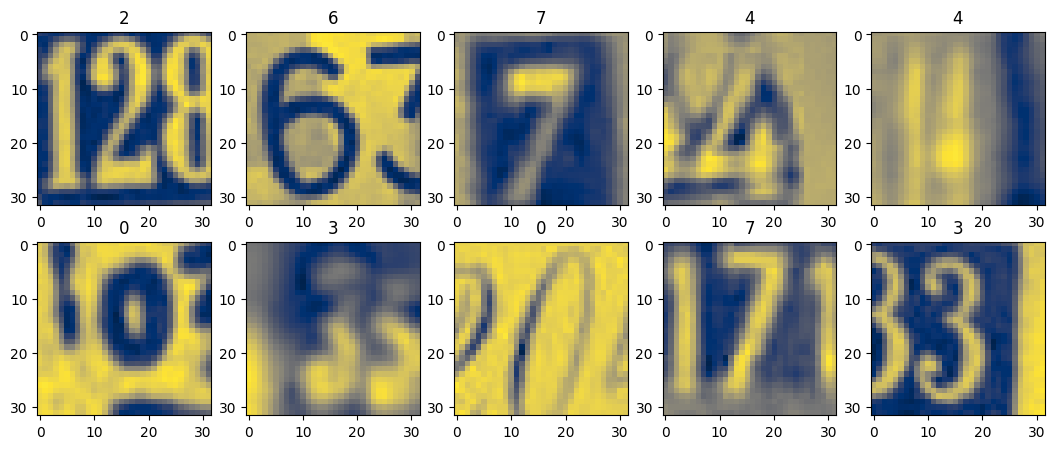

In [ ]:
# Using X_train to visualize the first 10 images and using Y_train to print corresponding labels of the first 10 images
fig = plt.figure(figsize=(13, 5)) # Here I am defining the plot size to 22x7 (width x height)
for i in range(10):
        img = fig.add_subplot(2, 5, i + 1) # Adding subplot wrapper to dictate the plot behaviour and viz.
        # In this case the figure will be represented as a 2x5 grid and axes are specified by the set position
        img.imshow(X_train[i], cmap = plt.get_cmap('cividis')) # Here I am plotting the image using cmap=cividis, we could also specify a gray colormap
        img.set_title(categories[y_train[i]])
plt.show()

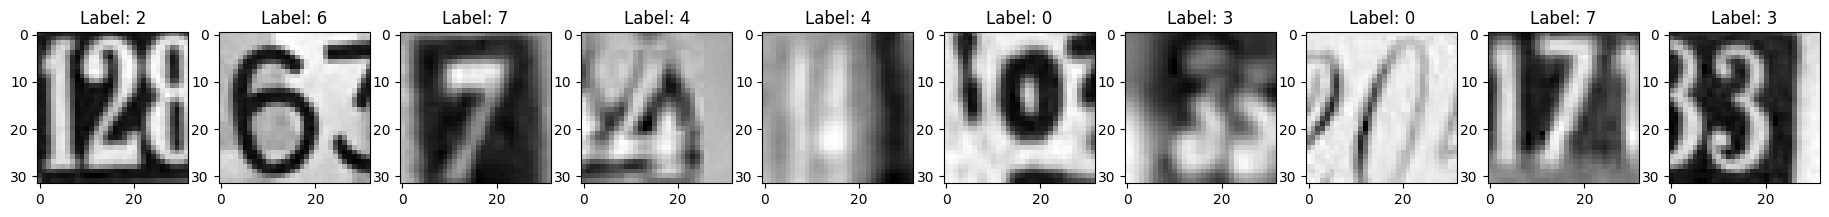

In [ ]:
# Plotting in gray scale, with formatted labels and change in plot orientation
fig = plt.figure(figsize=(23, 7)) # Defining the figure size to 23x7 (width x height)
for i in range(10):
        img = fig.add_subplot(1, 10, i + 1) # Adding subplot wrapper to dictate the plot behaviour and viz.
        # In this case the figure will be represented as a 1x10 grid and axes are specified by set position
        img.imshow(X_train[i], cmap = plt.get_cmap('gray')) # Here I am plotting the image using cmap=gray
        img.set_title('Label: {}'.format(categories[y_train[i]])) # Here I am also imposing a formatted label for each image
plt.show()

# To plot only one image, we can run plt.imshow(X_train[-1]) e.g. to plot last image

<div class="alert alert-info"><font size='2'>We see from the above plots that some images look more clear or defined compared to others. Curious to know how well these unclear images get predicted.</font></div>




[Text(0.5, 1.0, 'Distribution of Images in Validation Dataset per Label')]

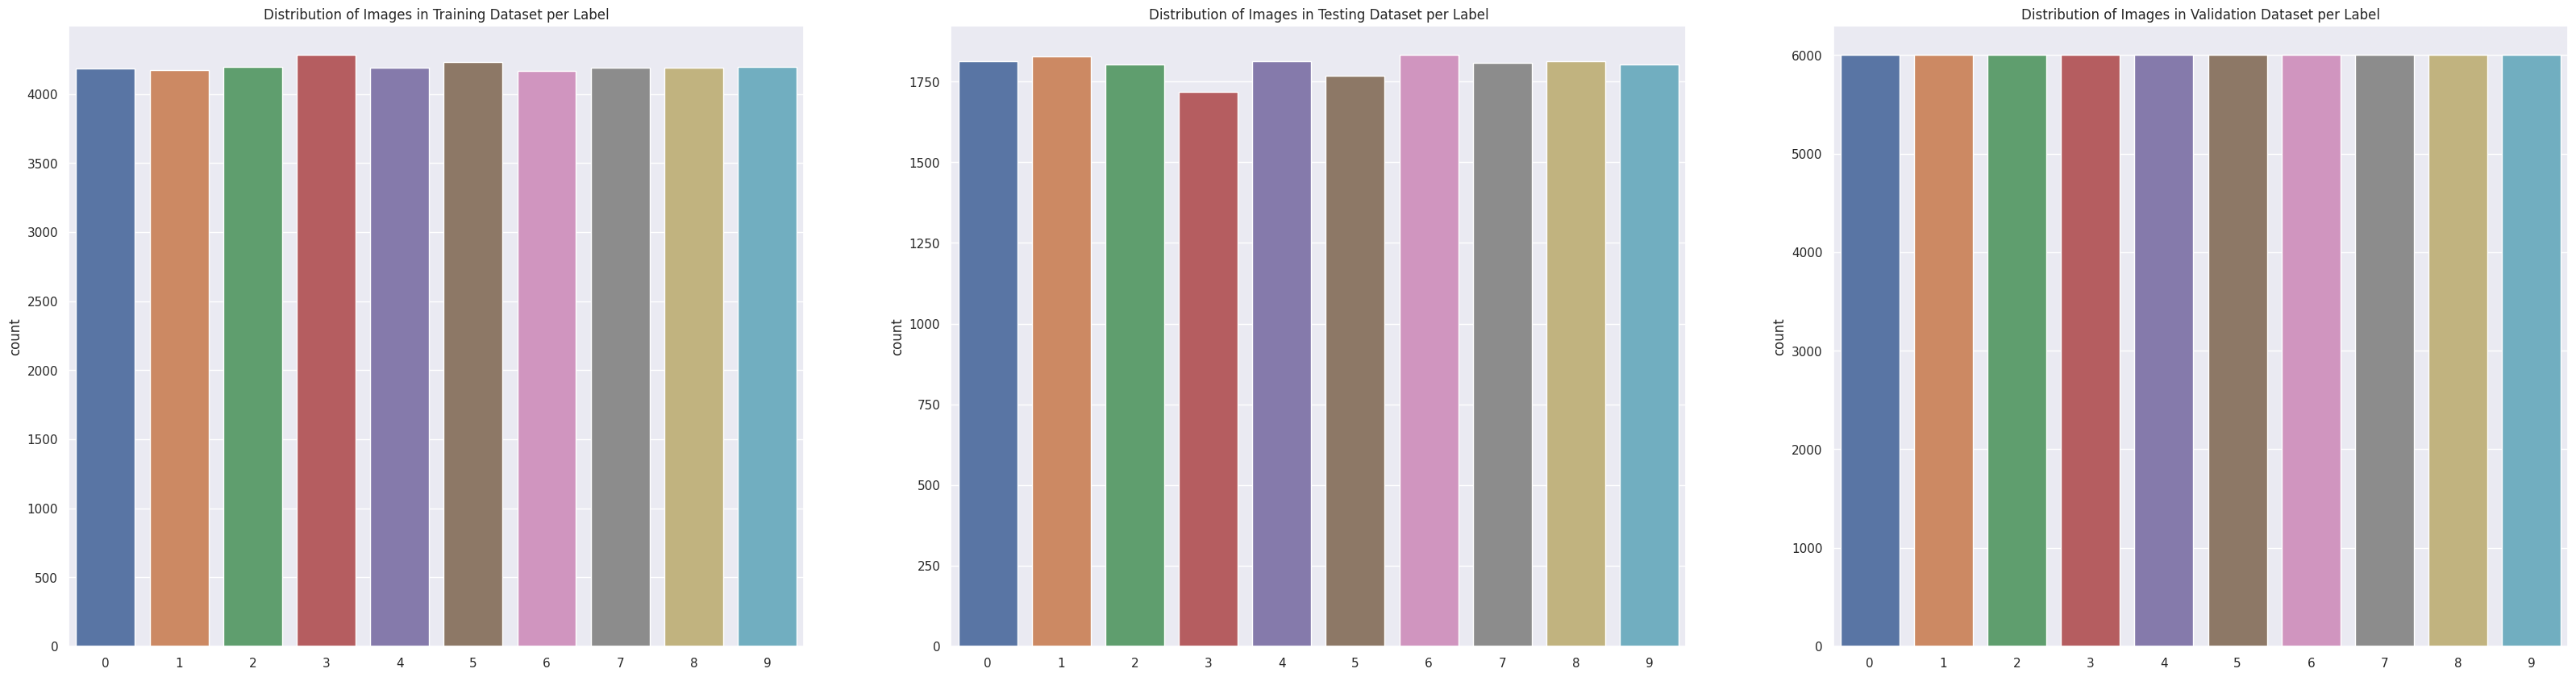

In [ ]:
# Before performing data preparation, I will visualize the distributions of each category in the training and test datasets:
# set the figure size
sns.set(rc={"figure.figsize":(40, 10)})
fig, axs = plt.subplots(ncols=3)
#sns.set(rc={"figure.figsize":(30, 10)})
sns.countplot(x=y_train,  ax=axs[0]).set(title='Distribution of Images in Training Dataset per Label')
sns.countplot(x=y_test,  ax=axs[1]).set(title='Distribution of Images in Testing Dataset per Label')
sns.countplot(x=y_val,  ax=axs[2]).set(title='Distribution of Images in Validation Dataset per Label')
#plt.show()

<div class="alert alert-info"><font size='2'> We can see from the above plots that the datasets appear to be nicely balanced especially the validation set, with each category/label having approximately the same number of images.
We expect accuracy be a good evaluation metric for model performance in this case. </font></div>

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

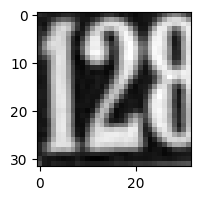

In [ ]:
# As we had already seen, below is the first image in the training dataset ('128')
fig = plt.figure(figsize=(2, 2))
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

In [ ]:
# Print the shape and the array of pixels for the first image in the training dataset.
# Shape of pixels for the first image in the training dataset
print("The shape of pixels for the first image in the training dataset is:", X_train[0].shape)
print("This 2-dimensional image (like the rest we have seen) has 32 pixels along its width and 32 pixels along its height")

The shape of pixels for the first image in the training dataset is: (32, 32)
This 2-dimensional image (like the rest we have seen) has 32 pixels along its width and 32 pixels along its height


In [ ]:
# Array of pixels for the first image in the training dataset
print("The array of pixels for the first image in the training dataset is: \n \n", X_train[0])

The array of pixels for the first image in the training dataset is: 
 
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


<div class="alert alert-info"><font size='2'> Gray scale images are often stored with pixel values that range from 0-255, but with neural networks, instead of values that go as high as 255, we often want low numbers between 0 and 1. By dividing all pixel values by 255, we keep the same information, whether light or dark pixel and we end up with numbers that are easy for neural networks to work with. In the code chunk below, I will normalise the data </font></div>


In [ ]:
# Reshaping array to desired shape for model building

# Reshape dataset to have a single channel
#X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
#X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))

X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)


### **Normalize the train and the test data**

In [ ]:
#Since the image pixel values range from 0-255, the data will be normalized by scaling -
# we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.
# Normalizing the image pixels
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

Print the shapes of Training and Test data

In [ ]:
# The shape of Training and Test data after reshaping
print("Shapes of Training and Test data after reshaping and normalizing \n")
print('-'*20, "Training Set", '-'*20, "\n")
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape, "\n")

print("Sneak peek into the pixel array: \n")
print("X_train: \n", X_train[0], "\n \n")


print('-'*20, "Testing Set", '-'*20, "\n")
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape, "\n")
print("Sneak peek into the pixel array: \n")
print("X_test \n", X_test[0], "\n")


Shapes of Training and Test data after reshaping and normalizing 

-------------------- Training Set -------------------- 

Shape of X_train:  (42000, 1024)
Shape of y_train:  (42000,) 

Sneak peek into the pixel array: 

X_train: 
 [0.12968785 0.11866706 0.10530196 ... 0.19477727 0.19942354 0.20799099] 
 

-------------------- Testing Set -------------------- 

Shape of X_test:  (18000, 1024)
Shape of y_test:  (18000,) 

Sneak peek into the pixel array: 

X_test 
 [0.15905097 0.18349686 0.19206432 ... 0.43143883 0.4360851  0.44780627] 



### **One-hot encode output**

In [ ]:
# Creating one-hot encoded representation of target labels
# We can do this by using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# to_categorical() function is also explained in the Neural Networks Module

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('-'*20,  "Encoded Training Data", '-'*20)
print(y_train, "\n")
print('-'*20,  "Encoded Testing Data", '-'*20)
print(y_test)

-------------------- Encoded Training Data --------------------
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

-------------------- Encoded Testing Data --------------------
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


### <div class="alert alert-info">Observation:<br><font size='2'>As we had earlier seen, the pixel values have values such 40.4763, 113.3028, 121.775 and 115.4228 which specify the color intensity of a specific pixel that range between 0-255. We then normalized the data to range between 0 and 1 which gave us values such as 0.12968785, 0.11866706, and 0.10530196. Given we are working with a multi-class/10-class classification problem, the output layer should have 10 neurons which will provide us with the probabilities of the input image belonging to each of those 10 classes. The one-hot encording encords or transforms the data into either 0 or 1 as we can see from the above output. This encording will also represent our target classes.</font></div>

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

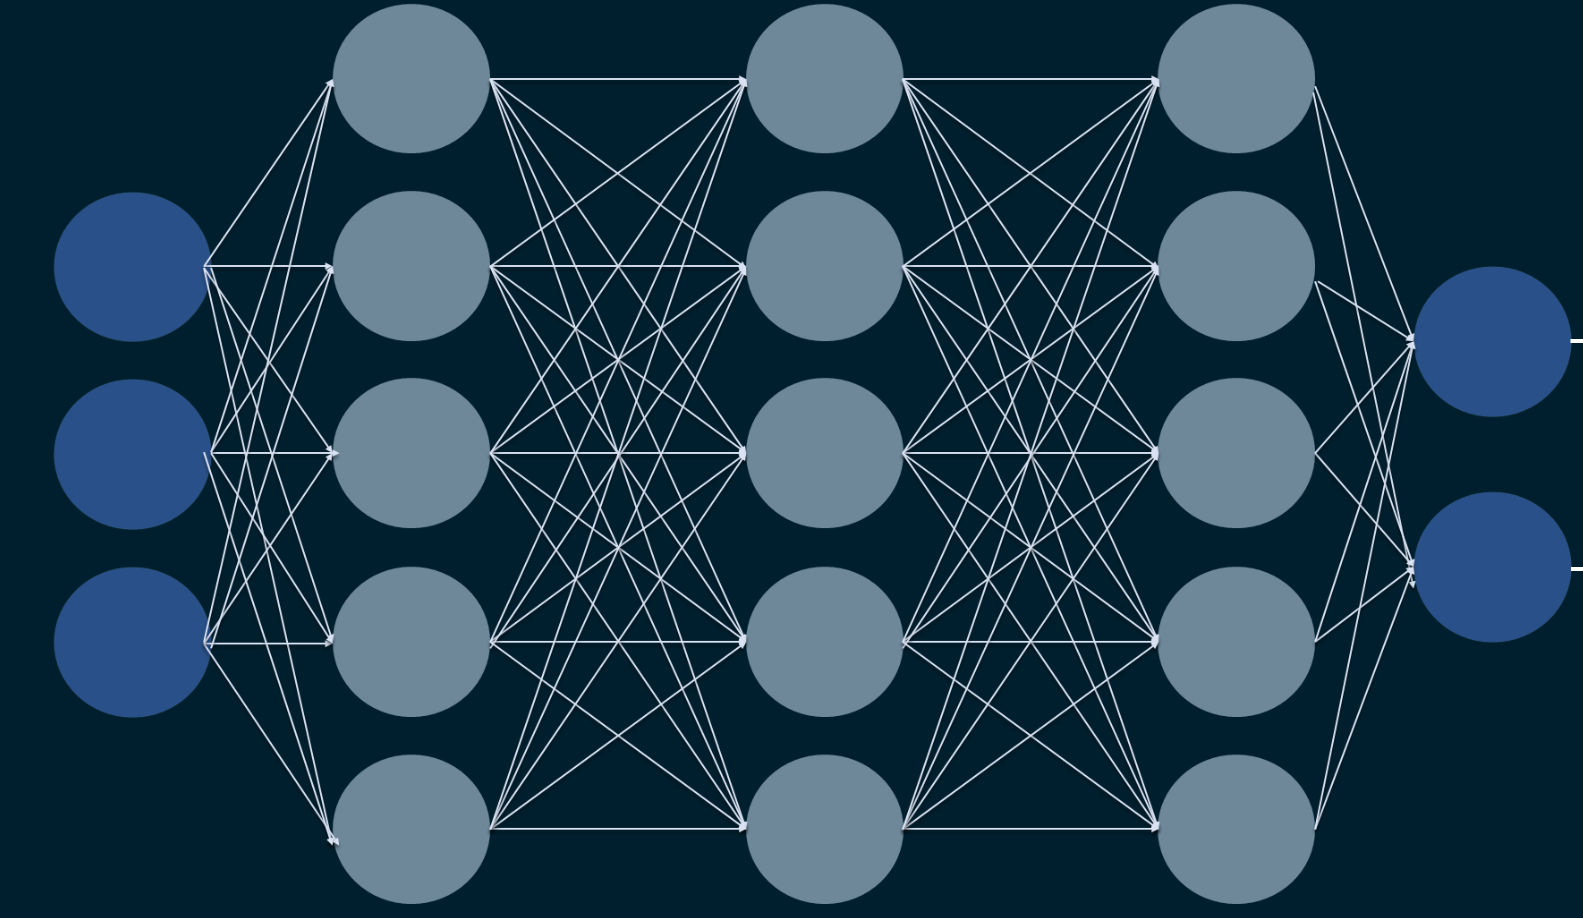

In [ ]:
# Fixing seed for random number generators - this aids reproducibility of these results each time run this code.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
# Building a feed-forward neural network with 2 hidden layers and one output layer.
# We will be adding the layers sequentially.
def nn_model_1():
  model = Sequential([ #Intializing sequential model
                      # First hidden layer with 64 nodes and the relu activation and the input shape = (1024, )
                      Dense(64, activation = 'relu', input_shape = (1024, )),
                      # Adding a second hidden layer with 32 nodes and the relu as the activation function
                      Dense(32, activation = 'relu'),
                      # Adding the output layer with 10 neurons/nodes and the softmax activation function since this is a
                      # multi-class classification problem
                      Dense(10, activation='softmax')
                      # Note that the number of nodes = the number of classes, i.e., 10
                      ])

  # Using Adam optimizer with a learning_rate of 0.001. We can also specify the momentum
  optimizer_adam = Adam(learning_rate=0.001)

  # Compiling the model with the loss equal to categorical_crossentropy, and metric equal to 'accuracy'
  model.compile(optimizer = optimizer_adam, loss = 'categorical_crossentropy', metrics= ['accuracy'])

  return model

# Building the model
ann_model_1 = nn_model_1()

# Generating and printing the summary of the model
ann_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-info"><font size='2'>
From the above output we see that we have specified our neural network as a sequential model where we add one layer at a time - from input to output, passing through a series of the neural network layers, one after the other. The input shape to our network is (1024, ) - 1024 images. We can also see from the model summary, and as supplied among the model parameters, that we have added a dense or hidden layer that is fully connected to our input layer and the number of trainable parameters or weights at this layer is 65600 (1024\*64 neurons +64 neurons in current layer). The second dense layer that is also fully connected to the previous layer has 32 neurons giving us 2080 (64\*32+32) which is the number of neurons from the previous layer, multiplied by the number of neurons in the current layer, plus the number of neurons in the current layer which is the required bias in neural networks. This bias helps the models to shift the activation function towards the positive or negative side. The last layer is the output layer that is also fully connected to the previous layer which contains 330 trainable weights (32\*10+10). This layer contains 10 neurons because we have 10 classes. All layers have trainable parameters. Overall, we have a total of 68,010 weights, or trainable parameters (from all layers) that need to be learned by the neural network.
</font></div>

In [ ]:
# Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20.
# Store the model building history to use later for visualization.
history = ann_model_1.fit(
            X_train, y_train,
            epochs=20,
            validation_split=0.2,
            shuffle=True,
            batch_size=128,
            verbose=1
)

Epoch 1/20
263/263 [==============================] - 3s 9ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 2s 7ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 3s 11ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 2s 6ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 1s 6ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 1s 5ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 1s 4ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch

### **Plot the Training and Validation Accuracies and write down your Observations.**

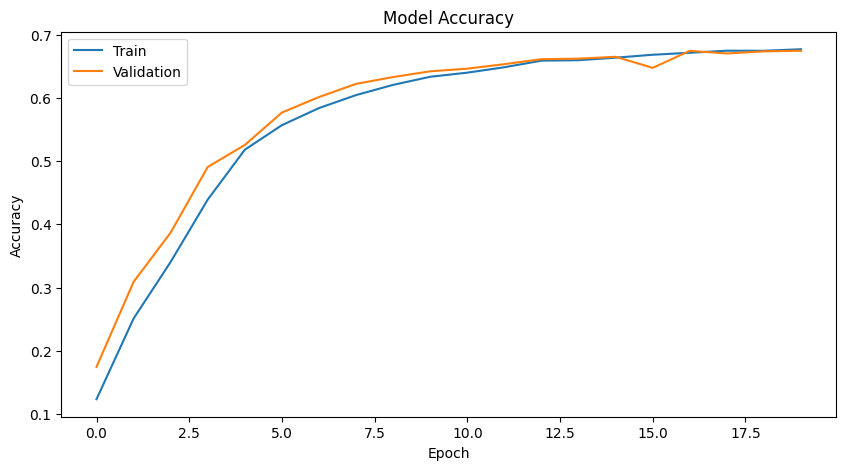

In [ ]:
# set the figure size
plt.figure(figsize = (10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### <div class="alert alert-info">Observations:<br><font size='2'>From the above plot and model output, we see that the accuracy of this model is fair in both training (68%) and validation sets (67%). We also see that the accuracy and pattern in both sets is almost comparable which indicates that the model is not overfitting the training dataset, otherwise we would have seen higher accuracy in the training set compared to the validation set. We also see that in both training and test sets, at each epoch, the loss function is steadily decreasing with an increase in accuracy. We'll need to perform hyperparameter tuning or try different models to obtain an high-performing model/improve our accuracy in both training and test sets. </font></div>

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
#Clearing keras backend
backend.clear_session()

#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
# Second model:
def nn_model_2():
    model = Sequential([ #Intializing sequential model
                        # First hidden layer with 256 nodes and the relu activation and the input shape = (1024, )
                        Dense(256, activation = 'relu', input_shape = (1024, )),
                        # Adding a second hidden layer with 128 nodes and the relu activation
                        Dense(128, activation = 'relu'),
                        # Adding a dropout layer to switch 20% (rate equal to 0.2) of neurons off randomly at each iteration to
                        # avoid overfitting and improve model performance
                        Dropout(0.2),
                        # Adding the third hidden layer with 64 nodes and the relu activation
                        Dense(64, activation = 'relu'),
                        # Adding the fourth hidden layer with 64 nodes and the relu activation
                        Dense(64, activation = 'relu'),
                        # Adding the fifth hidden layer with 32 nodes and the relu activation
                        Dense(32, activation = 'relu'),
                        # Adding batchNormalization layer
                        BatchNormalization(),
                        # Adding the output layer with 10 neurons (number of classes) and activation function as softmax
                        # since this is a multi-class classification problem
                        Dense(10, activation = 'softmax')
    ])

    # Using Adam optimizer as we had done before but with a learning rate of 0.0005
    optimizer_adam = Adam(learning_rate=0.0005)

    # Compiling the model with the loss equal to categorical_crossentropy, and metric equal to 'accuracy'
    model.compile(optimizer = optimizer_adam, loss = 'categorical_crossentropy', metrics= ['accuracy'])

    return model

# Building the model
ann_model_2 = nn_model_2()

# Generating and printing the summary of the model
ann_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (BatchN  (None, 32)               1

In [ ]:
# Fit on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30.
# Store the model building history to use later for visualization.
history_ann_model_2 = ann_model_2.fit(
            X_train, y_train,
            validation_split = 0.2,
            batch_size = 128,
            verbose = 1,
            epochs=30,
            shuffle=True # It's good practice to shuffle the data to reduce variance and to
            # make sure that model remains general and overfit less
)

Epoch 1/30
263/263 [==============================] - 3s 9ms/step - loss: 2.3301 - accuracy: 0.1019 - val_loss: 2.3127 - val_accuracy: 0.0969
Epoch 2/30
263/263 [==============================] - 2s 8ms/step - loss: 2.3034 - accuracy: 0.1034 - val_loss: 2.2998 - val_accuracy: 0.1087
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 2.0555 - accuracy: 0.2296 - val_loss: 1.9613 - val_accuracy: 0.3518
Epoch 4/30
263/263 [==============================] - 2s 7ms/step - loss: 1.5523 - accuracy: 0.4641 - val_loss: 1.4309 - val_accuracy: 0.5412
Epoch 5/30
263/263 [==============================] - 2s 7ms/step - loss: 1.3340 - accuracy: 0.5540 - val_loss: 1.2767 - val_accuracy: 0.5879
Epoch 6/30
263/263 [==============================] - 2s 7ms/step - loss: 1.2497 - accuracy: 0.5878 - val_loss: 1.1732 - val_accuracy: 0.6188
Epoch 7/30
263/263 [==============================] - 2s 7ms/step - loss: 1.1874 - accuracy: 0.6118 - val_loss: 1.1221 - val_accuracy: 0.6370
Epoch

### **Plot the Training and Validation Accuracies and write down your Observations.**

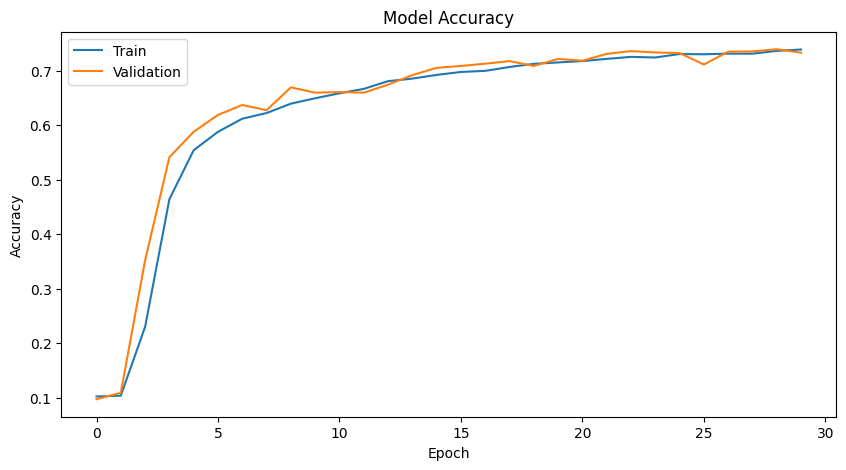

In [ ]:
# set the figure size
plt.figure(figsize = (10,5))
plt.plot(history_ann_model_2.history['accuracy'])
plt.plot(history_ann_model_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### <div class="alert alert-info">Observations:<br><font size='2'> We added more complexity to the second model, and we can see that we have added 3 dense layers, a drop out layer to switch off some neurons and avoid overfitting, and a batch normalization layer to introduce normalization within the layers as well. Overall, the network ended up with 310,250 trainable parameters to learn - over 240,000 more weights to learn compared to model 1. In this model we also increased the batch size and number of epochs which increased model performance. We now see that accuracy improved from 68% to 74% and 67% to 73% in the training and test datasets respectively. Adding a drop out layer also helped to reduce overfitting as seen from the model summary and the accuracy plot above. </font></div>

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# Here, I will evaluating the model on the test data - Checking test accuracy
accuracy = ann_model_2.evaluate(X_test, y_test, verbose=2)
accuracy

563/563 - 1s - loss: 0.8451 - accuracy: 0.7372 - 793ms/epoch - 1ms/step


[0.8450537919998169, 0.7372221946716309]

From the above predictions, we see a relatively small variance between the train and validation accuracy which suggest that the model is not overfitting as also seen in the plot above.

In [ ]:
# Make predictions on the test set using the second model
# Here we would get the output/predictions as probablities for each category as computed by sofmax
y_predictions = ann_model_2.predict(X_test)

563/563 [==============================] - 1s 1ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# The confusion matrix, defined as an inbuilt function in the TensorFlow module can be used for evaluating the classification model.
# It expects the input to be of categorical values. But y_test is an encoded value, and y_predictions has probablities.

# Before plotting the confusion matrix we need to get the categorical values back from the encoded values.
# We will use the argmax() function to obtain the maximum value over each category on both y_test
# and y_predictions and obtain their respective classes.

# Converting each entry of y_test to a single label to obtain categorical values
y_predictions_arg = np.argmax(y_predictions, axis = 1)
y_test_arg = np.argmax(y_test, axis = 1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1814
           1       0.68      0.82      0.74      1828
           2       0.77      0.76      0.76      1803
           3       0.74      0.70      0.72      1719
           4       0.66      0.85      0.74      1812
           5       0.73      0.68      0.70      1768
           6       0.79      0.70      0.74      1832
           7       0.75      0.79      0.77      1808
           8       0.82      0.62      0.70      1812
           9       0.73      0.70      0.71      1804

    accuracy                           0.74     18000
   macro avg       0.74      0.74      0.74     18000
weighted avg       0.74      0.74      0.74     18000



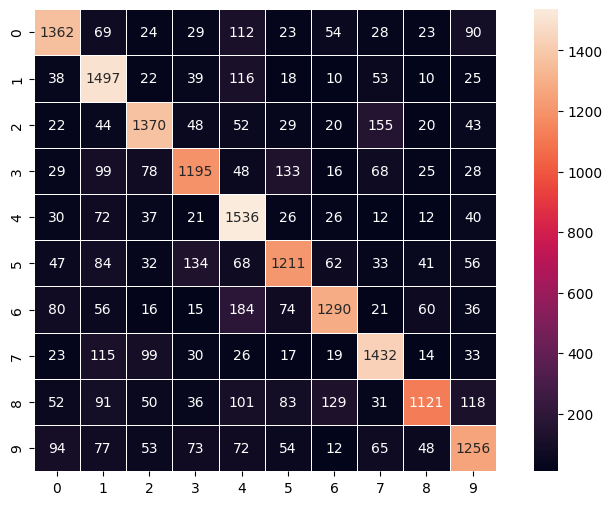

In [ ]:
# Printing the classification report
print(classification_report(y_test_arg, y_predictions_arg))

# Plotting the Confusion Matrix as a heatmap using the confusion matrix() function which is also a
# predefined tensorflow module like all the others we have seen
confusion_matrix = confusion_matrix(y_test_arg, y_predictions_arg)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot = True, linewidths = .4, fmt = '.0f', square = True, ax = ax)
plt.show()

### <div class="alert alert-info">Final Observations:<br><font size='2'>
In the above sections, we built two neural networks as part of an overall objective to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. As we have seen from the above analyses and models, model 2 outperformed model 1 largely because we increased the complexity of the second model by adding more layers to help extract more features in our data and to make better predictions. We reduced overfitting by switching off 20% of the neurons and also fine tuned some parameters like increasing the batch size and number of epochs to improve the loss function. From the classification report, we see that number 7 has the highest f1-score (0.77) implyting that it has a higher prediction accuracy compared to numbers, 5 and 8 (0.70). Number 4 has the lowest precision, and 8 has the highest, which means that 4 is being misclassified by the model while 8 has the lowest chances of being false positives. Number 4 has the highest recall, whereas 8 has the lowest. This implies that the model is not doing well at predicting number 8 compared to the identification of number 4. From the confusion matrix we can also see that the model misclassified may 8s and 5s and 9s as 5s. We can improve the model by running a few more models and fine tuning the model parameters.</font></div>


## **Using Convolutional Neural Networks**

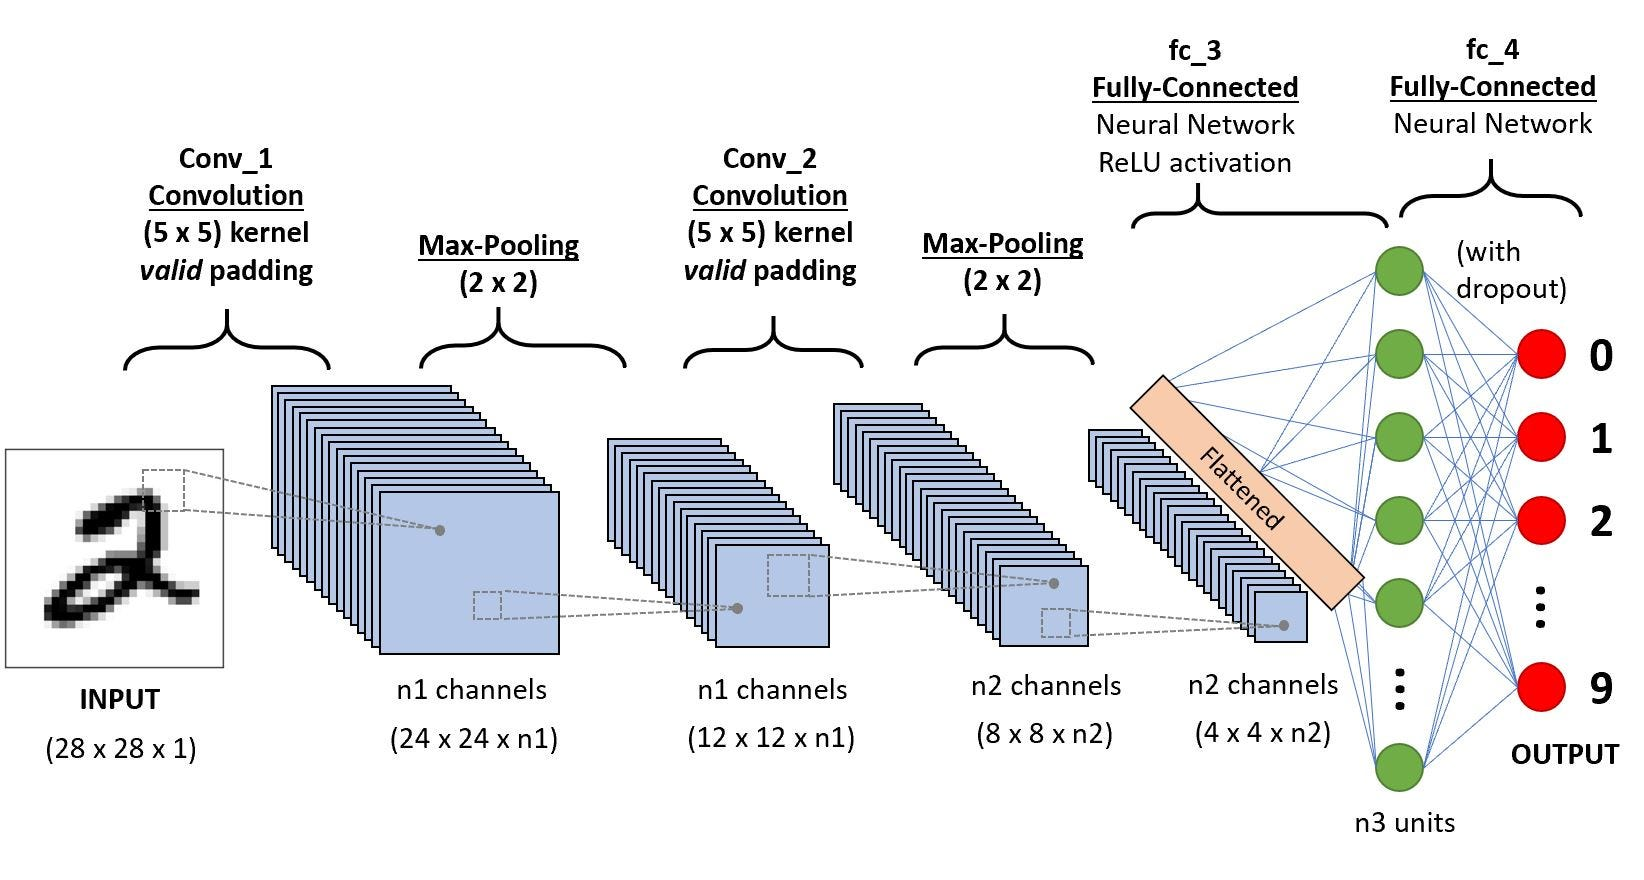

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Loading dataset, file path is still callable
svhn_df = h5py.File(file_path,'r')

#Splitting the data into the train and the test datasets
# Training data
X_train = svhn_df['X_train'][:]
y_train = svhn_df['y_train'][:]

# Testing data
X_test =  svhn_df['X_test'][:]
y_test =  svhn_df['y_test'][:]

svhn_df.close() # Closing file

Check the number of images in the training and the testing dataset.

In [ ]:
#Number of images in the training datasets
print('-'*20, "Dimensions of training datasets", '-'*20)
print()
print('The number of images in the training (X_train) is ', X_train.shape[0] , 'and the number of pixels along the height and width of the 2-dimensional image is', X_train.shape[1:])
print('The number of images in the training (y_train) is ', y_train.shape[0] , 'and the number of pixels along the height and width of the 2-dimensional image is', y_train.shape[1:])
print()
print()

# Number of images in the testing datasets
print('-'*20, "Dimensions of testing datasets", '-'*20)
print()
print('The number of images in the testing (X_test) is ', X_test.shape[0] , 'and the number of pixels along the height and width of the 2-dimensional image is', X_test.shape[1:])
print('The number of images in the testing (y_test) is ', y_test.shape[0] , 'and the number of pixels along the height and width of the 2-dimensional image is', y_test.shape[1:])
print()
print()

-------------------- Dimensions of training datasets --------------------

The number of images in the training (X_train) is  42000 and the number of pixels along the height and width of the 2-dimensional image is (32, 32)
The number of images in the training (y_train) is  42000 and the number of pixels along the height and width of the 2-dimensional image is ()


-------------------- Dimensions of testing datasets --------------------

The number of images in the testing (X_test) is  18000 and the number of pixels along the height and width of the 2-dimensional image is (32, 32)
The number of images in the testing (y_test) is  18000 and the number of pixels along the height and width of the 2-dimensional image is ()




### <div class="alert alert-info">Observations:<br><font size='2'>As earlier seen from the imported dataset, we have 6 datasets that embody the training, testing and validation datasets respectively: *'X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val'*  Overall, the X_train, X_test and X_val datasets are stored in 3-dimensional Numpy arrays (42000, 32, 32), (18000, 32, 32) and (60000, 32, 32) respectively. The first dimensions are still the same: 42000, 18000 and 60000 denote the number of images in the respective data, and each image is stacked on top of the other, making these 3-dimensional Numpy arrays. The second and third dimensions 32, 32 denote the number of pixels along the height and width of the 2-dimensional image. y_train, y_test and y_val on the other hand are one-dimensional NumPy arrays with 42000, 18000 and 60000 labels respectively. </font></div>

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

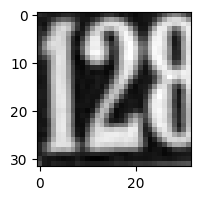

In [ ]:
# First image in the training dataset
fig = plt.figure(figsize=(2, 2))
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))

In [ ]:
# Print the shape and the array of pixels for the first image in the training dataset.
# Shape of pixels for the first image in the training dataset
print("The shape of pixels for the first image in the training dataset is:", X_train[0].shape)
print("This 2-dimensional image (like the rest we have seen) has 32 pixels along its width and 32 pixels along its height")

The shape of pixels for the first image in the training dataset is: (32, 32)
This 2-dimensional image (like the rest we have seen) has 32 pixels along its width and 32 pixels along its height


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshape dataset
X_train = X_train.reshape((X_train.shape[0], 32, 32, 1))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 1))
print("Shape of Training Set: ", X_train.shape)
print("Shape of Testing Set: ", X_test.shape)

Shape of Training Set:  (42000, 32, 32, 1)
Shape of Testing Set:  (18000, 32, 32, 1)


Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalizing the image pixels from 0-255 to 0-1
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

Print New shape of Training and Test

In [ ]:
# New shape of the training and test sets
print("Shape of Training Set: ", X_train.shape)
print("Shape of Testing Set: ", X_test.shape, "\n")

print('-'*20, "Normalized Training Set", '-'*20, "\n")
print(X_train[0])
print('-'*20, "Normalized Testing Set", '-'*20, "\n")
print(X_test[0])

Shape of Training Set:  (42000, 32, 32, 1)
Shape of Testing Set:  (18000, 32, 32, 1) 

-------------------- Normalized Training Set -------------------- 

[[[0.12968785]
  [0.11866706]
  [0.10530196]
  ...
  [0.2801847 ]
  [0.2283153 ]
  [0.16860352]]

 [[0.09893451]
  [0.10020902]
  [0.1175549 ]
  ...
  [0.4432192 ]
  [0.40534863]
  [0.33056822]]

 [[0.10304902]
  [0.08868118]
  [0.15873058]
  ...
  [0.44432473]
  [0.47754902]
  [0.45263842]]

 ...

 [[0.11196157]
  [0.14200786]
  [0.17678471]
  ...
  [0.09465059]
  [0.09840274]
  [0.10219726]]

 [[0.15072627]
  [0.10381687]
  [0.09126157]
  ...
  [0.11023294]
  [0.11556196]
  [0.11790627]]

 [[0.19724864]
  [0.10226392]
  [0.0942702 ]
  ...
  [0.19477727]
  [0.19942354]
  [0.20799099]]]
-------------------- Normalized Testing Set -------------------- 

[[[0.15905097]
  [0.18349686]
  [0.19206432]
  ...
  [0.43966785]
  [0.44309962]
  [0.43986115]]

 [[0.15465844]
  [0.17369059]
  [0.18500705]
  ...
  [0.43534195]
  [0.43508825]
  [0.

### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# Creating one-hot encoded representation of target labels
# We can do this by using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# to_categorical() function is also explained in the Neural Networks Module

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('-'*20,  "Encoded Training Data", '-'*20)
print(y_train, "\n")
print('-'*20,  "Encoded Testing Data", '-'*20)
print(y_test)

-------------------- Encoded Training Data --------------------
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

-------------------- Encoded Testing Data --------------------
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]


### <div class="alert alert-info">Observation:<br><font size='2'>As we had earlier seen, the pixel values have values such 40.4763, 113.3028, 121.775 and 115.4228 which specify the color intensity of a specific pixel that range between 0-255. We normalized the data to range between 0 and 1 which gave us values such as 0.12968785, 0.11866706, and 0.10530196. Given we are working with a multi-class/10-class classification problem, the output layer should have 10 neurons which will provide us with the probabilities of the input image belonging to each of those 10 classes. The one-hot encording encords or transforms the data into either 0 or 1 as we can see from the above output. This encording will also represent our target classes.</font></div>


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fixing seed for random number generators - this aids reproducibility of these results each time run this code.
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
# CNN Model:
def cnn_model_1():
    model = Sequential([ #Intializing sequential model
                        # Adding first convolutional layer with 16 filters and the kernel size of 3x3.
                        # Use the 'same' padding and provide the input shape = (32, 32, 1)
                        Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
                        Conv2D(32, (3, 3), padding="same"),
                        # Adding another LeakyRelu with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D((2, 2)),
                        # Flattening the output from the previous layer
                        Flatten(),
                        # Adding a dense layer with 32 nodes
                        Dense(32),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding the final output layer with nodes equal to the number of classes, i.e., 10 and
                        # 'softmax' as the activation function
                        Dense(10, activation='softmax')

                        ])

    # Using Adam optimizer as we had done before but with a learning rate of 0.001
    optimizer_adam = Adam(learning_rate=  0.001)

    # Compiling the model with the loss equal to categorical_crossentropy, and metric equal to 'accuracy'
    model.compile(optimizer = optimizer_adam, loss = 'categorical_crossentropy', metrics= ['accuracy'])

    return model

# Building the model
cnn_model1 = cnn_model_1()

# Generating and printing the summary of the model
cnn_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                      

In [ ]:
# Fitting the model on the training data with a validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20.
# Store the model building history to use later for visualization.
history_model1 = cnn_model1.fit(
            X_train, y_train,
            validation_split=0.2,
            batch_size=32,
            verbose=1,
            epochs=20,
            shuffle=True
)

Epoch 1/20
1050/1050 [==============================] - 55s 51ms/step - loss: 1.1221 - accuracy: 0.6345 - val_loss: 0.6440 - val_accuracy: 0.8127
Epoch 2/20
1050/1050 [==============================] - 50s 47ms/step - loss: 0.5312 - accuracy: 0.8474 - val_loss: 0.5237 - val_accuracy: 0.8481
Epoch 3/20
1050/1050 [==============================] - 51s 49ms/step - loss: 0.4355 - accuracy: 0.8724 - val_loss: 0.4873 - val_accuracy: 0.8608
Epoch 4/20
1050/1050 [==============================] - 50s 48ms/step - loss: 0.3736 - accuracy: 0.8903 - val_loss: 0.4442 - val_accuracy: 0.8755
Epoch 5/20
1050/1050 [==============================] - 50s 47ms/step - loss: 0.3272 - accuracy: 0.9023 - val_loss: 0.4512 - val_accuracy: 0.8739
Epoch 6/20
1050/1050 [==============================] - 49s 47ms/step - loss: 0.2865 - accuracy: 0.9137 - val_loss: 0.4767 - val_accuracy: 0.8737
Epoch 7/20
1050/1050 [==============================] - 49s 46ms/step - loss: 0.2553 - accuracy: 0.9222 - val_loss: 0.4704 -

### **Plot the Training and Validation Accuracies and Write your observations.**

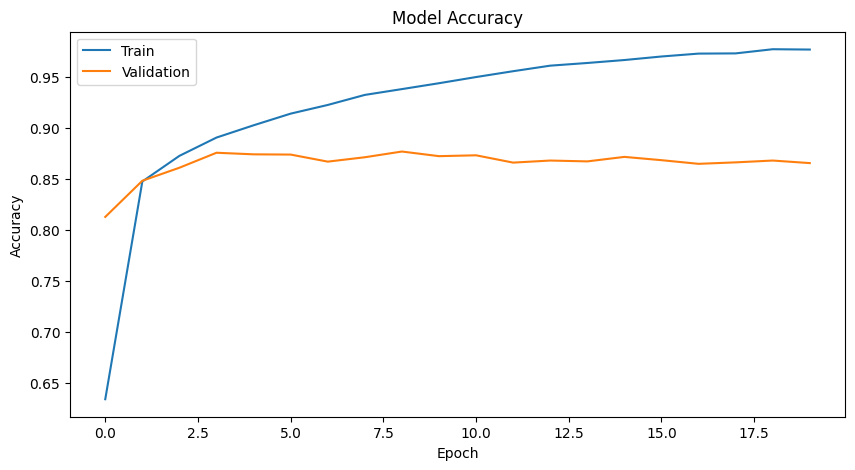

In [ ]:
# set the figure size
plt.figure(figsize = (10,5))
plt.plot(history_model1.history['accuracy'])
plt.plot(history_model1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### <div class="alert alert-info">Observations:<br><font size='2'>
Compared to the ANNs we built prior, the accuracy achieved with the above CNN model is relatively higher, reaching highs of 98% for the training dataset and 87% for the testing set. We see that the model is faily complex with 9 layers (elaborated in the output summary) and 267,306 trainable weights that the model needed to learn. The model performs quite well on the training dataset and we see that at each epoch, the loss function is decreasing while the accuracy is improving, however, for the test dataset, we see the contrary - the loss function is increasing with an increase in accuracy. Idealy, we would like to see a decreasing loss function. In this case we could tune our model more for example decreasing the learning rate and checking model performance there after. From the above plot, we can also see that the model perfomed well on training dataset compared to the validation dataset, we also see a degree of overfitting on the training data. </font></div>

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
# Second CNN model:
def cnn_model_2():
    model = Sequential([ #Intializing sequential model
                        # Adding the first Convolutional layer with 16 filters and the kernel size of 3x3.
                        # Use the 'same' padding and provide the input shape = (32, 32, 1)
                        Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding the second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
                        Conv2D(32, (3, 3), padding="same"),
                        # Adding a LeakyRelu with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D((2, 2)),
                        # Adding a BatchNormalization layer
                        BatchNormalization(),
                        # Adding a third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
                        Conv2D(32, (3, 3), padding="same"),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding the fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding
                        Conv2D(64, (3, 3), padding="same"),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a max-pooling layer with a pool size of 2x2
                        MaxPooling2D((2, 2)),
                        # Adding a BatchNormalization layer
                        BatchNormalization(),
                        # Adding a layer to flatten the output from the previous layer
                        Flatten(),
                        # Adding a dense layer with 32 nodes
                        Dense(32),
                        # Adding a LeakyRelu layer with the slope equal to 0.1
                        LeakyReLU(0.1),
                        # Adding a dropout layer with the rate equal to 0.5
                        Dropout(0.5),
                        # Adding the final output layer with nodes equal to the number of classes, i.e., 10
                        # and 'softmax' as the activation function
                        Dense(10, activation='softmax')
                        ])

    # Using Adam optimizer as we had done before with a learning rate of 0.001
    optimizer_adam = Adam(learning_rate= 0.001)

    # Compile the model with the categorical_crossentropy loss, and metric equal to 'accuracy'
    model.compile(optimizer = optimizer_adam, loss = 'categorical_crossentropy', metrics= ['accuracy'])

    return model

# Building the model
cnn_model2 = cnn_model_2()

# Generating and printing the summary of the model
cnn_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [ ]:
# Fitting the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30.
# Store the model building history to use later for visualization.

history_model2 = cnn_model2.fit(
            X_train, y_train,
            validation_split=0.2,
            batch_size=128,
            verbose=1,
            epochs=30,
            shuffle=True
)

Epoch 1/30
263/263 [==============================] - 87s 325ms/step - loss: 1.3295 - accuracy: 0.5471 - val_loss: 1.8674 - val_accuracy: 0.3290
Epoch 2/30
263/263 [==============================] - 87s 330ms/step - loss: 0.6629 - accuracy: 0.7964 - val_loss: 0.5246 - val_accuracy: 0.8555
Epoch 3/30
263/263 [==============================] - 85s 324ms/step - loss: 0.5477 - accuracy: 0.8324 - val_loss: 0.4239 - val_accuracy: 0.8758
Epoch 4/30
263/263 [==============================] - 85s 323ms/step - loss: 0.4905 - accuracy: 0.8508 - val_loss: 0.4194 - val_accuracy: 0.8768
Epoch 5/30
263/263 [==============================] - 87s 330ms/step - loss: 0.4373 - accuracy: 0.8636 - val_loss: 0.4409 - val_accuracy: 0.8751
Epoch 6/30
263/263 [==============================] - 84s 321ms/step - loss: 0.4066 - accuracy: 0.8757 - val_loss: 0.3845 - val_accuracy: 0.8883
Epoch 7/30
263/263 [==============================] - 85s 324ms/step - loss: 0.3819 - accuracy: 0.8829 - val_loss: 0.3758 - val_ac

### **Plot the Training and Validation accuracies and write your observations.**

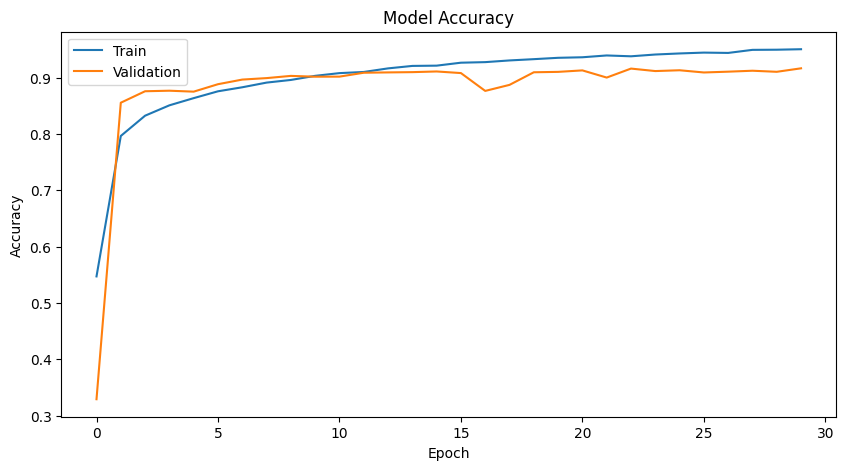

In [ ]:
# set the figure size
plt.figure(figsize = (10,5))
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### <div class="alert alert-info">Observations:<br><font size='2'>In this model (please refer to model summary based on prior explanations regarding model complexity and hyperparameter tuning), we see a reduction in overfitting. We also see a slight decrease (though still good) in the accuracy of the training set (97% to 95%)  and an improvement in the accuracy of the testing set 87% to 91%, however, the loss function starts increasing again after the 17th epoch. Let's plot and visualise the loss function:</font></div>

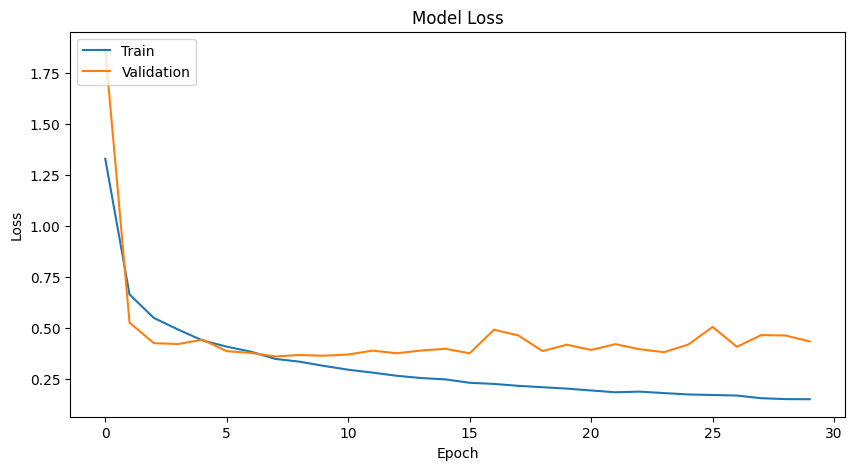

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(history_model2.history['loss'])
plt.plot(history_model2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Here, I will evaluating the model on the test data - Checking test accuracy
accuracy = cnn_model2.evaluate(X_test, y_test, verbose=2)
accuracy

563/563 - 11s - loss: 0.4415 - accuracy: 0.9146 - 11s/epoch - 20ms/step


[0.4415017366409302, 0.914555549621582]

From the above predictions, we see a relatively small variance between the train and validation accuracy which suggest that the model is not overfitting as also seen in the plot above. edit accordingly

In [ ]:
# Make predictions on the test set using the second model
# Here we would get the output/predictions as probablities for each category as computed by sofmax
y_predictions = cnn_model2.predict(X_test)
y_predictions

563/563 [==============================] - 12s 22ms/step


array([[1.3281262e-02, 9.8559123e-01, 1.6348002e-05, ..., 1.7661217e-04,
        8.4033742e-04, 2.9879089e-05],
       [8.7053788e-21, 3.5102637e-08, 8.3935490e-09, ..., 9.9999994e-01,
        4.8508052e-20, 1.3897836e-21],
       [5.4141303e-19, 9.3028227e-19, 9.9999994e-01, ..., 4.7155612e-13,
        3.6255785e-14, 1.5151050e-16],
       ...,
       [1.5733467e-15, 2.5488394e-08, 5.9298239e-12, ..., 9.9999994e-01,
        2.0293824e-18, 9.8997058e-19],
       [5.4599734e-09, 3.3405843e-08, 1.2510950e-05, ..., 2.7651598e-07,
        2.0266010e-01, 6.3995674e-04],
       [7.1572378e-16, 4.6162586e-05, 9.9113250e-01, ..., 8.8214278e-03,
        6.2563649e-15, 3.0329229e-17]], dtype=float32)

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# As earlier hinted, before plotting the confusion matrix we need to get the categorical values back from the encoded values.
# We will use the argmax() function to obtain the maximum value over each category on both y_test and
# y_predictions and obtain their respective classes.

# Converting each entry of y_test to a single label to obtain categorical values
y_predictions_arg = np.argmax(y_predictions,axis=1)
y_test_arg = np.argmax(y_test, axis = 1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1814
           1       0.90      0.92      0.91      1828
           2       0.94      0.91      0.92      1803
           3       0.89      0.89      0.89      1719
           4       0.93      0.93      0.93      1812
           5       0.90      0.92      0.91      1768
           6       0.90      0.91      0.90      1832
           7       0.93      0.94      0.93      1808
           8       0.93      0.89      0.91      1812
           9       0.90      0.91      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



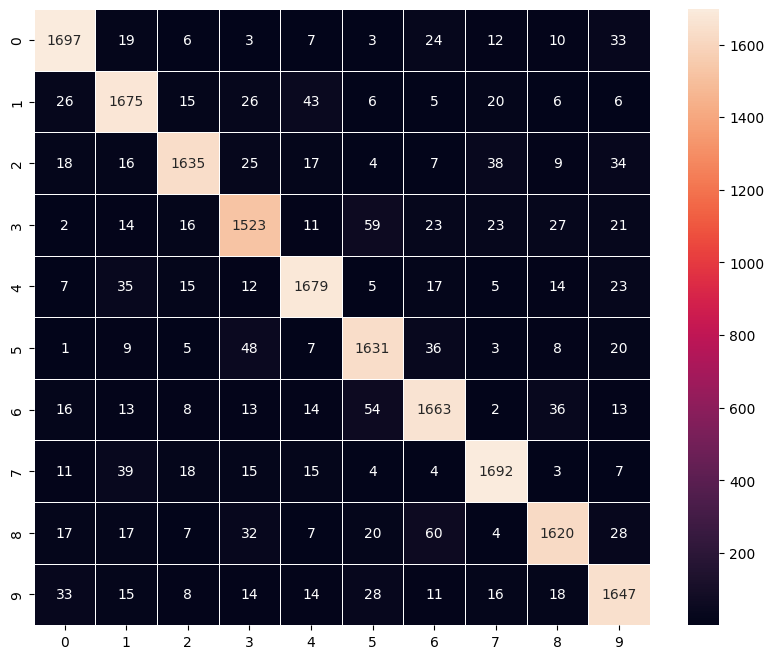

In [ ]:
# Printing the classification report
print(classification_report(y_test_arg, y_predictions_arg))

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_predictions_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

### <div class="alert alert-info">Final Observations:<br><font size='2'>

Overall, we see that the Convolutional Neural Networks we built perform better in predicting the numbers depicted in the SVHN dataset compared to Artificial Neural Networks. This is largely driven by the ability of CNNs to identify complex paterns in image data. Compared to model 2 (ANN), and as we have seen in model 2 of the CNN, the model achieved 95% and 92% accuracy for the training and validation sets respectively, with precision, recall, and an f1-score at 91%, which is quite good. However, we still see that this model can be improved especially with the increasing loss function seen in the validation set. We also still see missclassifications in the confusion matrix where 3s tend to be misclassified as 5s, 1s as 4s, 6 as 8, with an overall need to improve model predictions. To improve the model further, we can conduct more hyperparameter tuning and try different architectures, we can work with more training data, we can also train the model using different optimizers to improve our predictions. Additionally, we can employ data augmentation which makes our models more robust by making them invariant to image transitions or orientations. Finally, we can leverage transfer learning to apply weights learned from much larger networks onto our data to improve predictions with continous fine tuning.  
Despite the aforementioned limitations, the model exhibits high accuracy in predicting numbers and could be of promising utility to real-world image classification problems. </font></div>